# EDA of the WorldCupMatches and WorldCups datasets

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 10) 
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import re
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import d2_absolute_error_score
from scipy.stats import skellam
from sklearn.linear_model import LogisticRegression

In [98]:
path = './data/Fifa_world_cup/'
df_matches = pd.read_csv(path + 'WorldCupMatches.csv')
df_world_cups = pd.read_csv(path + 'WorldCups.csv')

In [99]:
df_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
62,1950.0,29 Jun 1950 - 15:00,Group 2,Independencia,Belo Horizonte,USA,1.0,0.0,England,,10151.0,1.0,0.0,DATTILO Generoso (ITA),DE LA SALLE Charles (FRA),GALEATI Giovanni (ITA),208.0,1202.0,USA,ENG
64,1950.0,02 Jul 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,1.0,0.0,England,,74462.0,0.0,0.0,GALEATI Giovanni (ITA),LUTZ Jean (SUI),DATTILO Generoso (ITA),208.0,1199.0,ESP,ENG
93,1954.0,26 Jun 1954 - 17:00,Quarter-finals,St. Jakob,Basel,Uruguay,4.0,2.0,England,,28000.0,2.0,1.0,STEINER Carl (AUT),STEFANOVIC Vasa (YUG),ORLANDINI Vincenzo (ITA),212.0,1264.0,URU,ENG
102,1958.0,08 Jun 1958 - 19:00,Group 4,Nya Ullevi,Gothenburg,Soviet Union,2.0,2.0,England,,49348.0,1.0,0.0,ZSOLT Istvan (HUN),NILSEN Birger (NOR),JORGENSEN Carl Frederik (DEN),220.0,1372.0,URS,ENG
109,1958.0,11 Jun 1958 - 19:00,Group 4,Nya Ullevi,Gothenburg,Brazil,0.0,0.0,England,,40895.0,0.0,0.0,DUSCH Albert (GER),LOEOEW Bertil (SWE),ZSOLT Istvan (HUN),220.0,1339.0,BRA,ENG
125,1958.0,17 Jun 1958 - 19:00,Group 4,Nya Ullevi,Gothenburg,Soviet Union,1.0,0.0,England,,23182.0,0.0,0.0,DUSCH Albert (GER),BRONKHORST Jan (NED),SEIPELT Fritz (AUT),220.0,1373.0,URS,ENG
142,1962.0,31 May 1962 - 15:00,Group 4,Estadio El Teniente-Codelco,Rancagua,Hungary,2.0,1.0,England,,7938.0,1.0,0.0,HORN Leo (NED),BLAVIER Arthur (BEL),GOLDSTEIN Leo (USA),231.0,1490.0,HUN,ENG
161,1962.0,10 Jun 1962 - 14:30,Quarter-finals,Estadio Sausalito,Vina Del Mar,Brazil,3.0,1.0,England,,17736.0,1.0,1.0,SCHWINTE Pierre (FRA),DIENST Gottfried (SUI),BUSTAMANTE Sergio (CHI),232.0,1459.0,BRA,ENG
214,1970.0,07 Jun 1970 - 12:00,Group 3,Jalisco,Guadalajara,Brazil,1.0,0.0,England,,66843.0,0.0,0.0,KLEIN Abraham (ISR),YAMASAKI MALDONADO Arturo (MEX),MACHIN Roger (FRA),250.0,1764.0,BRA,ENG
225,1970.0,14 Jun 1970 - 12:00,Quarter-finals,Nou Camp - Estadio Le�n,Leon,Germany FR,3.0,2.0,England,Germany FR win after extra time,23357.0,0.0,0.0,COEREZZA Norberto Angel (ARG),VELASQUEZ Guillermo (COL),ORTIZ DE MENDIBIL Jose Maria (ESP),251.0,1811.0,FRG,ENG


In [4]:
df_world_cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [5]:
print(f'df_matches shape = {df_matches.shape} ')
print(f'df_world_cups shape = {df_world_cups.shape} ')

df_matches shape = (4572, 20) 
df_world_cups shape = (20, 10) 


In [6]:
nan_count_matches= df_matches[df_matches.isna().any(axis=1)].shape[0]
nan_count_world_cups = df_world_cups[df_world_cups.isna().any(axis=1)].shape[0]

print(f'Number of rows containing NaN values for df_matches {nan_count_matches}')
print(f'Number of rows containing NaN values for df_world_cups {nan_count_world_cups}')

Number of rows containing NaN values for df_matches 3722
Number of rows containing NaN values for df_world_cups 0


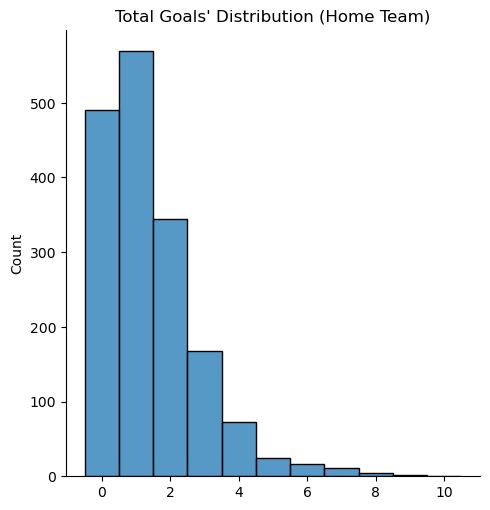

In [7]:
matches_goals = df_matches['Home Team Goals'].values.tolist() + df_matches['Away Team Goals'].values.tolist()

sns.displot(x=matches_goals, discrete=True)
plt.title("Total Goals' Distribution (Home Team)")
plt.show()

In [8]:
df_world_cups = df_world_cups.dropna()
countries = df_world_cups['Country'].unique()
df_world_cups = df_world_cups.rename(columns={'Runners-Up':'Second'})
winners = df_world_cups['Winner'].value_counts()
seconds = df_world_cups['Second'].value_counts()
thirds = df_world_cups['Third'].value_counts()
fourths = df_world_cups['Fourth'].value_counts()

teams = pd.concat([winners, seconds, thirds, fourths], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)

py.offline.init_notebook_mode(connected=True)
cf.go_offline()
teams.iplot(kind = 'bar', xTitle='Teams', yTitle='Count', title='FIFA World Cup Rankings Count',filename='world_cup.png')

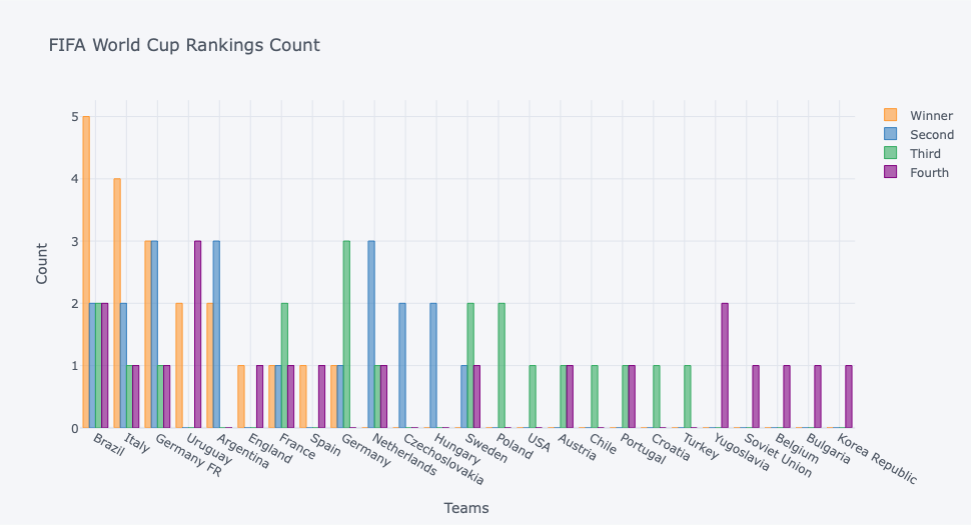

The number of goal a team scored and conceded seems to carry some information about the overall performance of the team in the competition. Therefore, we create a new feature to incorporate each teams performance over the years, we do that by calculating two scores which takes more into account the average number of goals scored $\text{gs}_A$ and conceded $\text{gc}_A$, by team $A$ over the years, weighting the performance in more recent world cups with more importance. For $\gamma \in (0,1)$


* $\text{gs}_A \propto \displaystyle \sum_{i=1}^{m} \dfrac{1}{\gamma^m} \text{ number of goals scored in year } m \text{ by team A}$
* $\text{gc}_A \propto \displaystyle \sum_{i=1}^{m} \dfrac{1}{\gamma^m} \text{ number of goals conceded in year } m \text{ by team A}$

We will later incorporate this information when creating our models.

In [9]:
def calculate_goals_averages(df, team):
    df_team_scored_home = df[(df['Home Team Name'] == team)][['Year', 'Home Team Name', 'Home Team Goals', 'Away Team Goals']]
    df_team_scored_home = df_team_scored_home.rename({'Home Team Name': 'Team', 'Home Team Goals': 'goals_scored', 'Away Team Goals':'goals_conceded'}, axis='columns')
    df_team_scored_away = df[(df['Away Team Name'] == team)][['Year', 'Away Team Name', 'Away Team Goals', 'Home Team Goals']]
    df_team_scored_away = df_team_scored_away.rename({'Away Team Name': 'Team', 'Away Team Goals': 'goals_scored', 'Home Team Goals':'goals_conceded'}, axis='columns')
    df_team = pd.concat((df_team_scored_home, df_team_scored_away))
    
    team_performance = df_team.groupby('Year', as_index = False).mean()
    return team_performance
    

def calculate_goals_features(df, team, gamma=0.95):
    
    team_performance = calculate_goals_averages(df, team)
    team_avg_score = np.asarray(team_performance['goals_scored'])
    team_avg_conc = np.asarray(team_performance['goals_conceded'])
    
    
    weighted_importance_scores = [gamma**(-i)*team_avg_score[i] for i in range(len(team_avg_score))]
    weighted_importance_conc = [gamma**(-i)*team_avg_conc[i] for i in range(len(team_avg_conc))]
    return np.mean(weighted_importance_scores), np.mean(weighted_importance_conc)

def get_winner_years(df, team):
    years_team_won = list(df[df['Winner'] == team]['Year'])
    return years_team_won
    

def plot_goals_features(df, team, df_winners=None):
    team_performance = calculate_goals_averages(df, team)
    year = team_performance['Year']
    team_avg_score = np.asarray(team_performance['goals_scored'])
    team_avg_conc = np.asarray(team_performance['goals_conceded'])

    fig, ax = plt.subplots(figsize=(12,8))

    ax.scatter(year, team_avg_score,c='red', label='Number of goals scored')
    ax.plot(year, team_avg_score, c='coral', linestyle = 'dashed')

    ax.scatter(year, team_avg_conc, c='b', label='Number of goals conceded')
    ax.plot(year, team_avg_conc, c='lightblue', linestyle = 'dashed')
    

    if df_winners is not None:
        years_team_won = get_winner_years(df_winners, team)
        team_perf_winner = team_performance[team_performance.Year.isin(years_team_won)]
        team_avg_score_winner = team_perf_winner['goals_scored']
        team_avg_conc_winner = team_perf_winner['goals_conceded']

        ax.scatter(years_team_won, team_avg_score_winner, marker='*', s=170, zorder=2, c='gold', label=f'{team} won the championship')
        ax.scatter(years_team_won, team_avg_conc_winner, marker='*', s=170, zorder=2, c='gold')


    ax.set_xlabel('Year', fontsize = 15)
    ax.set_xticks(year)

    ax.set_ylabel('Average number of goals', fontsize = 15)
    ax.set_yticks([0,1,2,3,4])

    ax.set_title(f'Average number of goals scored and conceded by {team} in World Cups', fontsize = 15)
    ax.legend()

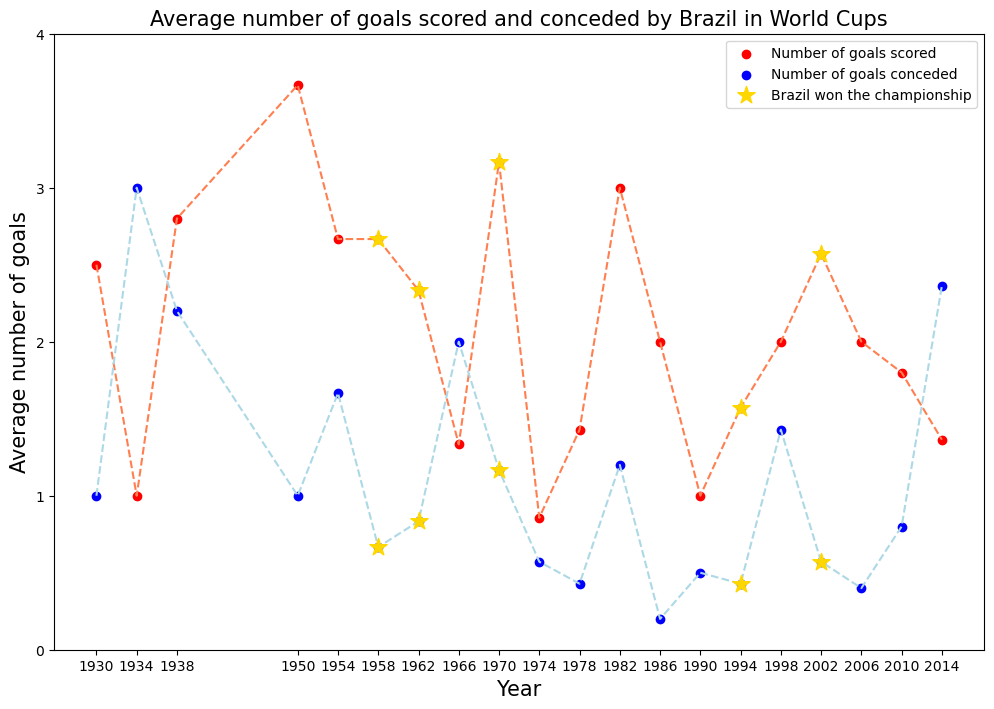

In [10]:
plot_goals_features(df_matches, team='Brazil', df_winners=df_world_cups)

In [11]:
countries = ['Argentina', 'Brazil', 'Italy', 'Germany', 'Spain', 'France']

for country in countries:
    score = calculate_goals_features(df_matches, team=country, gamma=0.95)
    print(f'Weighted scores for {country} is {score}')

Weighted scores for Argentina is (2.4555842099781073, 1.72111295660726)
Weighted scores for Brazil is (3.4244243920000286, 1.7998619634176851)
Weighted scores for Italy is (2.331285068505324, 1.622840298213803)
Weighted scores for Germany is (2.5142977781043863, 1.3711406016238457)
Weighted scores for Spain is (2.2592086019295508, 1.6582214629544985)
Weighted scores for France is (2.193801024324274, 1.8441779387828916)


In [12]:
df_matches_clean = df_matches.copy()
df_matches_clean = df_matches_clean.dropna()
df_matches_clean

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [13]:
columns_to_remove = ['Datetime', 'Stadium', 'City', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID']
df_matches_clean = df_matches_clean.drop(columns=columns_to_remove)
df_matches_clean

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Home Team Initials,Away Team Initials
0,1930.0,Group 1,France,4.0,1.0,Mexico,,FRA,MEX
1,1930.0,Group 4,USA,3.0,0.0,Belgium,,USA,BEL
2,1930.0,Group 2,Yugoslavia,2.0,1.0,Brazil,,YUG,BRA
3,1930.0,Group 3,Romania,3.0,1.0,Peru,,ROU,PER
4,1930.0,Group 1,Argentina,1.0,0.0,France,,ARG,FRA
...,...,...,...,...,...,...,...,...,...
847,2014.0,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),NED,CRC
848,2014.0,Semi-finals,Brazil,1.0,7.0,Germany,,BRA,GER
849,2014.0,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),NED,ARG
850,2014.0,Play-off for third place,Brazil,0.0,3.0,Netherlands,,BRA,NED


We also merge some stages and teams and startarize how they are called.

In [14]:
def preprocess_stage(df):
    stages_dict = {}

    group_phase = ['Preliminary round',
                   'First round',
                   'Group 1',
                   'Group 2',
                   'Group 3',
                   'Group 4',
                   'Group 5',
                   'Group 6',
                   'Group A',
                   'Group B',
                   'Group C',
                   'Group D',
                   'Group E',
                   'Group F',
                   'Group G',
                   'Group H']

    for key in group_phase:
        stages_dict[key] = 'Group'

    stages_dict['Round of 16'] = 'Round of 16'

    stages_dict['Quarter-finals'] = 'Quarter-finals'

    stages_dict['Semi-finals'] = 'Semi-finals'

    third_place = ['Match for third place', 'Play-off for third place', 'Third place']
    for key in third_place:
        stages_dict[key] = 'Third-place'

    stages_dict['Final'] = 'Final'
    
    df_processed = df.copy()
    df_processed['Stage'] = df['Stage'].apply(lambda x: stages_dict[x])
    
    return df_processed

def preprocess_teams(df):
    pairs = [ ('rn">Bosnia and Herzegovina', 'Bosnia and Herzegovina'), ('rn">Serbia and Montenegro','Serbia and Montenegro'),
            ('rn">Trinidad and Tobago', 'Trinidad and Tobago'), ('rn">United Arab Emirates', 'United Arab Emirates'),
            ('C�te d\'Ivoire', 'Cote d\'Ivoire'), ('rn">Republic of Ireland', 'Ireland')]
    df_processed = df.copy()
    
    for team in pairs:
        df_processed.loc[df['Away Team Name'] == team[0], 'Away Team Name'] = team[1]
        df_processed.loc[df['Home Team Name'] == team[0], 'Home Team Name'] = team[1]
    return df_processed

In [15]:
df_matches_clean = preprocess_stage(df_matches_clean)
df_matches_clean = preprocess_teams(df_matches_clean)

Additionally we stract information about which team won a match. If the number of goals of each teams is the same, it is possible that the match ended up in a tie, or that a team won in penalties. This information is contained in the `Win coditions` feature.

In [16]:
df_matches_clean['Win conditions'].unique()

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time ', ' win on penalties (2 - 3) ',
       ' win on penalties (3 - 4) ', ' win on penalties (4 - 3) ',
       'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penaltie

In [17]:
def preprocess_winner(df):
    winners = []
    for index, row in df.iterrows():
        home_team_goals = row['Home Team Goals']
        away_team_goals = row['Away Team Goals']
        win_conditions = row['Win conditions']
        home_team_name = row['Home Team Name']
        away_team_name = row['Away Team Name']
        
        if  home_team_goals > away_team_goals:
            winners.append(1)
        elif home_team_goals < away_team_goals:
            winners.append(2)
        elif (home_team_goals == away_team_goals) and (win_conditions == " "):
            winners.append(0)
        elif (home_team_goals == away_team_goals) and (home_team_name in win_conditions):
            winners.append(1)
        elif (home_team_goals == away_team_goals) and (away_team_name in win_conditions):
            winners.append(2)
        else:
            penalties = re.findall(r'\d+', win_conditions)
            home_team_penalties = int(penalties[0])
            away_team_penalties = int(penalties[1])
            if home_team_penalties > away_team_penalties:  
                winners.append(1)
            else:  
                winners.append(2)
                
    df_new = df.copy()
    df_new['Winner'] = winners
    return df_new

In [18]:
df_matches_clean = preprocess_winner(df_matches_clean)
df_matches_clean = df_matches_clean.drop(columns=['Win conditions'])
df_matches_clean['Year'] = df_matches_clean['Year'].astype(int)
df_matches_clean['Home Team Goals'] = df_matches_clean['Home Team Goals'].astype(int)
df_matches_clean['Away Team Goals'] = df_matches_clean['Away Team Goals'].astype(int)
df_matches_clean

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Initials,Away Team Initials,Winner
0,1930,Group,France,4,1,Mexico,FRA,MEX,1
1,1930,Group,USA,3,0,Belgium,USA,BEL,1
2,1930,Group,Yugoslavia,2,1,Brazil,YUG,BRA,1
3,1930,Group,Romania,3,1,Peru,ROU,PER,1
4,1930,Group,Argentina,1,0,France,ARG,FRA,1
...,...,...,...,...,...,...,...,...,...
847,2014,Quarter-finals,Netherlands,0,0,Costa Rica,NED,CRC,1
848,2014,Semi-finals,Brazil,1,7,Germany,BRA,GER,2
849,2014,Semi-finals,Netherlands,0,0,Argentina,NED,ARG,2
850,2014,Third-place,Brazil,0,3,Netherlands,BRA,NED,2


In [19]:
columns_to_remove = ['Home Team Name', 'Away Team Name']
df_matches_clean = df_matches_clean.drop(columns=columns_to_remove)
df_matches_clean.to_csv("./data/Fifa_world_cup/dt_matches_clean.csv")

Finally, we perform onde hot encoding for the categorical feataures of our dataset: `Stage`, `Home Team Initials` and `Away Team Initials`.

In [20]:
df_matches_clean = pd.concat([df_matches_clean, pd.get_dummies(df_matches_clean['Stage'])], axis=1)
df_matches_clean = df_matches_clean.drop(columns=['Stage'])
df_matches_clean

,Year,Home Team Goals,Away Team Goals,Home Team Initials,Away Team Initials,Winner,Final,Group,Quarter-finals,Round of 16,Semi-finals,Third-place
0,1930,4,1,FRA,MEX,1,0,1,0,0,0,0
1,1930,3,0,USA,BEL,1,0,1,0,0,0,0
2,1930,2,1,YUG,BRA,1,0,1,0,0,0,0
3,1930,3,1,ROU,PER,1,0,1,0,0,0,0
4,1930,1,0,ARG,FRA,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,0,0,NED,CRC,1,0,0,1,0,0,0
848,2014,1,7,BRA,GER,2,0,0,0,0,1,0
849,2014,0,0,NED,ARG,2,0,0,0,0,1,0
850,2014,0,3,BRA,NED,2,0,0,0,0,0,1


In [21]:
teams = sorted(list(set(df_matches_clean['Home Team Initials'].values.tolist() + df_matches_clean['Away Team Initials'].values.tolist())))

#encoder = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(np.asarray(teams).reshape(-1,1))
encoder = OneHotEncoder(sparse=False).fit(np.asarray(teams).reshape(-1,1))

In [22]:
encoder

OneHotEncoder(sparse=False)

In [23]:
home_initials_values = df_matches_clean['Home Team Initials'].values.reshape(-1, 1)
home_initials_values = encoder.transform(home_initials_values)
home_initials_names = ['Home_' + team_name for team_name in teams]
home_initials_df = pd.DataFrame(home_initials_values, columns=home_initials_names).astype(int)
home_initials_df

,Home_ALG,Home_ANG,Home_ARG,Home_AUS,Home_AUT,Home_BEL,Home_BIH,Home_BOL,Home_BRA,Home_BUL,...,Home_TUN,Home_TUR,Home_UAE,Home_UKR,Home_URS,Home_URU,Home_USA,Home_WAL,Home_YUG,Home_ZAI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
away_initials_values = df_matches_clean['Away Team Initials'].values.reshape(-1, 1)
away_initials_values = encoder.transform(away_initials_values)
away_initials_names = ['Away_' + team_name for team_name in teams]
away_initials_df = pd.DataFrame(away_initials_values, columns=away_initials_names).astype(int)
away_initials_df

,Away_ALG,Away_ANG,Away_ARG,Away_AUS,Away_AUT,Away_BEL,Away_BIH,Away_BOL,Away_BRA,Away_BUL,...,Away_TUN,Away_TUR,Away_UAE,Away_UKR,Away_URS,Away_URU,Away_USA,Away_WAL,Away_YUG,Away_ZAI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_matches_clean = df_matches_clean.reset_index().drop(columns=['index'])
df_matches_clean = df_matches_clean.drop(columns=['Home Team Initials', 'Away Team Initials'])
pd.concat([df_matches_clean, away_initials_df, away_initials_df], axis=1)

,Year,Home Team Goals,Away Team Goals,Winner,Final,Group,Quarter-finals,Round of 16,Semi-finals,Third-place,...,Away_TUN,Away_TUR,Away_UAE,Away_UKR,Away_URS,Away_URU,Away_USA,Away_WAL,Away_YUG,Away_ZAI
0,1930,4,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1930,3,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1930,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1930,3,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1930,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2014,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,2014,1,7,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
847,2014,0,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
848,2014,0,3,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_matches_clean.columns

Index(['Year', 'Home Team Goals', 'Away Team Goals', 'Winner', 'Final',
       'Group', 'Quarter-finals', 'Round of 16', 'Semi-finals', 'Third-place'],
      dtype='object')

# Poisson Regression

## Baseline Poisson

In [27]:
df = pd.read_csv("data/Fifa_world_cup/dt_matches_clean.csv", index_col=0)

In [28]:
df["Stage"].unique()

array(['Group', 'Semi-finals', 'Final', 'Quarter-finals', 'Third-place',
       'Round of 16'], dtype=object)

In [29]:
col = ["Home Team Initials", "Away Team Initials", "Home Team Goals"]
df_home = df[col]
df_home.rename(columns={"Home Team Initials": "team", "Away Team Initials": "opponent", "Home Team Goals": "goals"}, inplace=True)

In [30]:
df_home["home"] = 1

In [31]:
col = ["Away Team Initials", "Home Team Initials", "Away Team Goals"]
df_away = df[col]
df_away.rename(columns={"Away Team Initials": "team", "Home Team Initials": "opponent", "Away Team Goals": "goals"}, inplace=True)

In [32]:
df_away["home"] = 0

In [33]:
df_=pd.concat([df_home, df_away], axis=0, ignore_index=True)
df_

,team,opponent,goals,home
0,FRA,MEX,4,1
1,USA,BEL,3,1
2,YUG,BRA,2,1
3,ROU,PER,3,1
4,ARG,FRA,1,1
...,...,...,...,...
1695,CRC,NED,0,0
1696,GER,BRA,7,0
1697,ARG,NED,0,0
1698,NED,BRA,3,0


In [34]:
ohe = OneHotEncoder()
preprocess = ColumnTransformer(transformers=[("ohe", ohe, ["team", "opponent"])], remainder="passthrough")

In [35]:
X_=df_[df_.columns.drop("goals")]
y=df_["goals"]
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size=0.05, random_state=42)

In [36]:
y_val

1492    3
115     3
135     5
352     4
1302    0
       ..
1211    1
29      2
1403    2
1379    0
1690    0
Name: goals, Length: 85, dtype: int64

In [37]:
preprocess.fit(X_)
X_train_ = preprocess.transform(X_train)
X_val_ = preprocess.transform(X_val)

model=PoissonRegressor(alpha=0, fit_intercept=True, max_iter=10000)
model.fit(X_train_,y_train)

y_train_hat = model.predict(X_train_)
y_val_train = model.predict(X_train_)

In [38]:
y_train_hat= pd.DataFrame(y_train_hat)
y_train_hat.rename(columns={0:"y_hat"}, inplace=True)
y_train_hat

,y_hat
0,0.004394
1,1.040101
2,1.394152
3,2.935358
4,1.932526
...,...
1610,0.921101
1611,1.839093
1612,0.770626
1613,1.380242


In [39]:
X_train.shape, y_train.shape

((1615, 3), (1615,))

In [40]:
y_train_hat_ = pd.DataFrame(np.hstack((X_train[["team"]], y_train_hat)), columns=["team", "y_hat"])
y_train_hat_

,team,y_hat
0,CAN,0.004394
1,JPN,1.040101
2,ITA,1.394152
3,FRG,2.935358
4,AUT,1.932526
...,...,...
1610,MEX,0.921101
1611,URU,1.839093
1612,MEX,0.770626
1613,USA,1.380242


In [41]:
lam_ = y_train_hat_.groupby("team").mean()
lam_.reset_index(inplace=True)
lam_ = lam_.sort_values(by="y_hat")

In [42]:
lam_

,team,y_hat
81,ZAI,0.003309
12,CHN,0.003432
10,CAN,0.003549
34,INH,0.018339
71,TRI,0.019271
...,...,...
73,TUR,1.890095
8,BRA,2.020192
26,FRG,2.100481
28,GER,2.133866


In [43]:
X_train_.shape, y_train.shape

((1615, 165), (1615,))

In [44]:
model.score(X_train_,y_train)

0.2488610299977808

In [45]:
model.score(X_val_, y_val)

0.24139495759700536

In [46]:
def predict_proba(y, lam):
    v1 = lam**y
    v2 = np.exp(-lam)
    v3 = []
    for i in y:
        v3.append(np.math.factorial(int(i)))
    v3 = np.array(v3)
    proba = (v1*v2)/v3
    return proba

In [47]:
goals = np.array([x for x in range(8)])
# p = predict_proba(goals, float(lam_[lam_.team =="GBR"]["y_hat"]))
# p.rename("pred_proba", inplace=True)
lam_[lam_.team =="GBR"]["y_hat"]

Series([], Name: y_hat, dtype: float64)

Text(0.5, 1.0, "Goals' Probability \n Teams that made it to Qatar 2022 Quarter-Finals ")

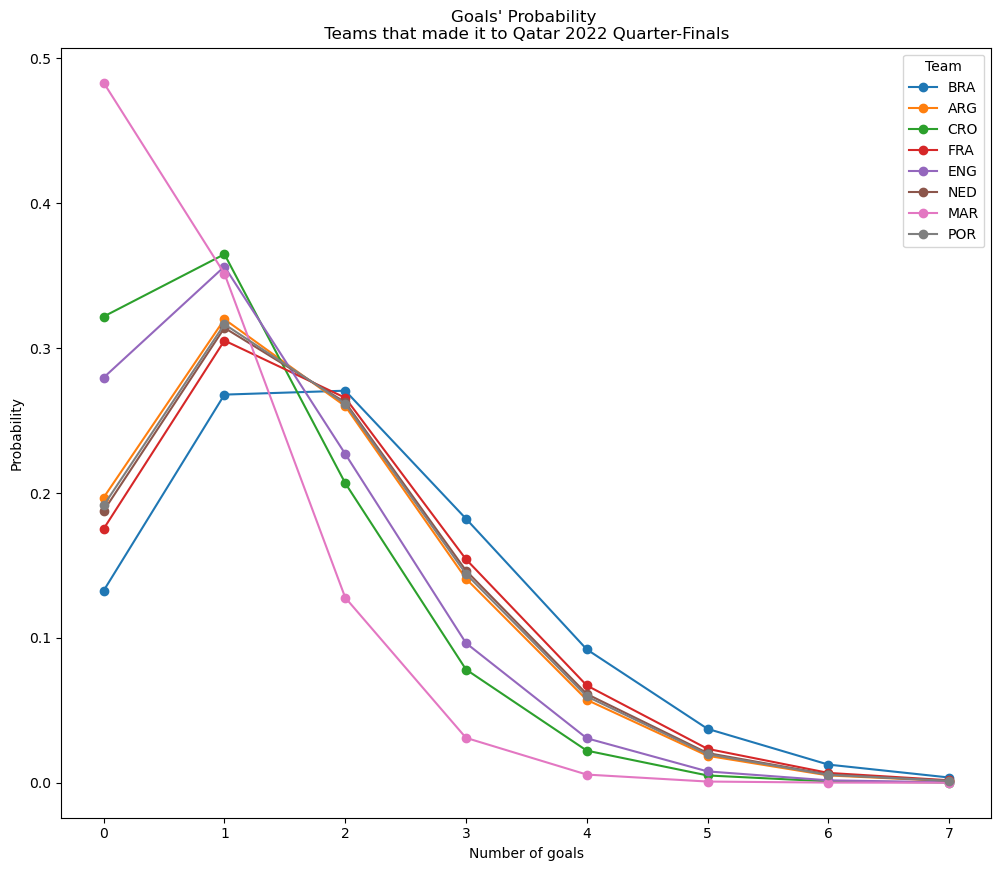

In [48]:
selected = ["BRA", "ARG", "CRO", "FRA", "ENG", "NED", "MAR", "POR"] # Current countries participating in Quarter-Finals
for c in selected:
    p = predict_proba(goals, float(lam_[lam_.team == c]["y_hat"]))
    plt.plot(goals, p, marker='o', label=c)
plt.legend(title="Team")
plt.xlabel("Number of goals")
plt.ylabel("Probability")
plt.title("Goals' Probability \n Teams that made it to Qatar 2022 Quarter-Finals ")

Text(0, 0.5, 'Probability')

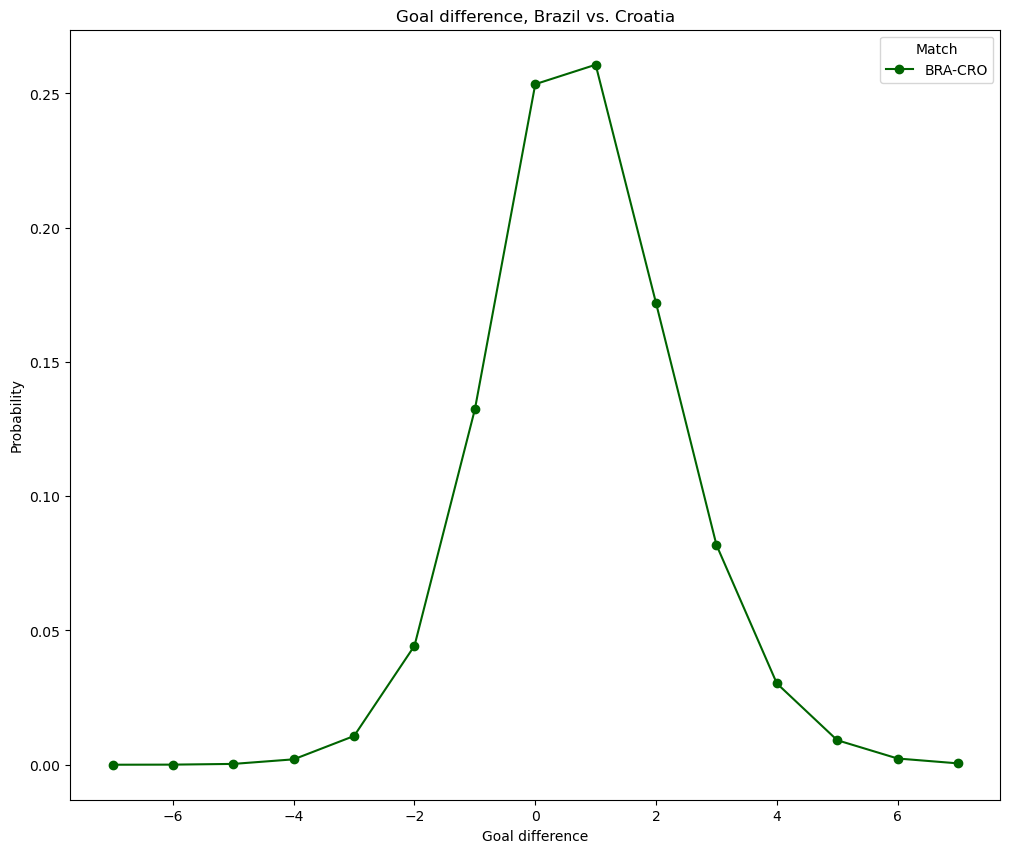

In [49]:
# Skellam is the distribution for the difference between 2 poisson distributions

testA = pd.DataFrame({"team":"BRA","opponent": "CRO","home": 1}, index=[0])
testB = pd.DataFrame({"team":"CRO","opponent": "BRA","home": 0}, index=[0])
muA, muB = model.predict(preprocess.transform(testA)), model.predict(preprocess.transform(testB))
diffgoals = np.array([x for x in range(-7,8,1)])
plt.plot(diffgoals, skellam.pmf(diffgoals, muA, muB), marker="o", label="BRA-CRO", color="darkgreen")
plt.title("Goal difference, Brazil vs. Croatia")
plt.legend(title="Match")
plt.xlabel("Goal difference")
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

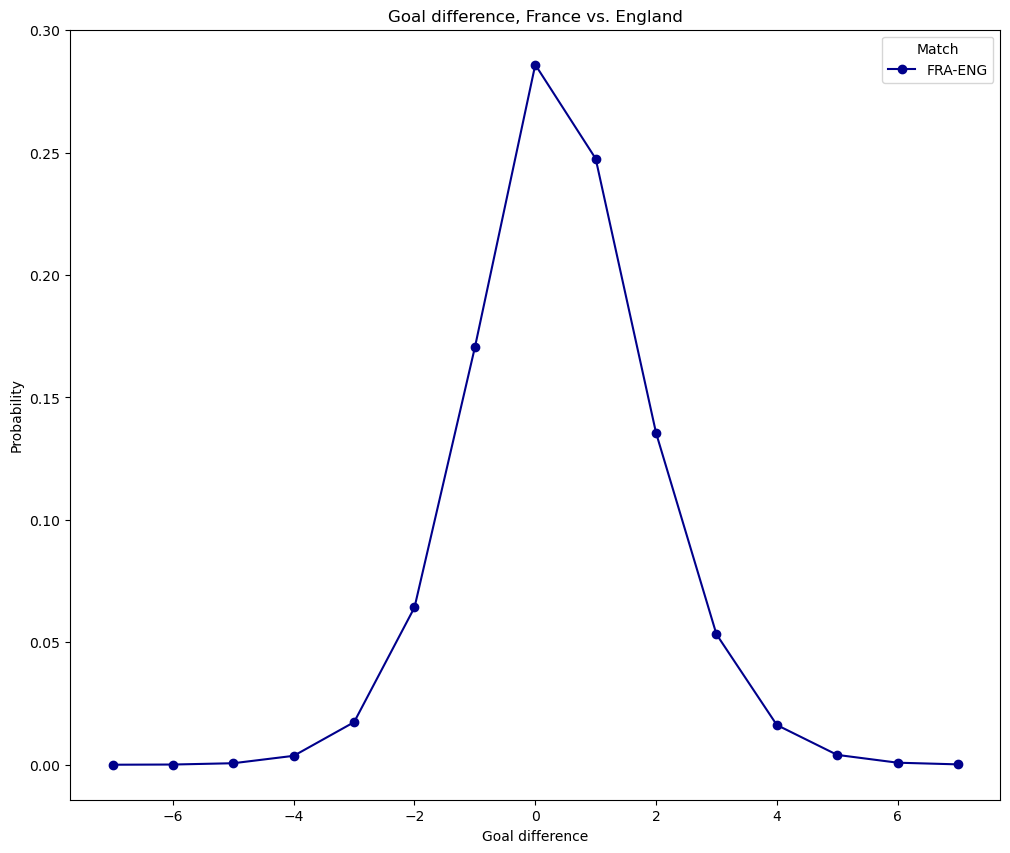

In [50]:
# Skellam is the distribution for the difference between 2 poisson distributions
testA = pd.DataFrame({"team":"FRA","opponent": "ENG","home": 1}, index=[0])
testB = pd.DataFrame({"team":"ENG","opponent": "FRA","home": 0}, index=[0])
muA, muB = model.predict(preprocess.transform(testA)), model.predict(preprocess.transform(testB))
diffgoals = np.array([x for x in range(-7,8,1)])
plt.plot(diffgoals, skellam.pmf(diffgoals, muA, muB), marker="o", label="FRA-ENG", color="darkblue")
plt.title("Goal difference, France vs. England")
plt.legend(title="Match")
plt.xlabel("Goal difference")
plt.ylabel("Probability")

In [51]:
model.predict(preprocess.transform(testA))

array([1.28546199])

## Additional Features

In [52]:
df["Stage"].unique()

array(['Group', 'Semi-finals', 'Final', 'Quarter-finals', 'Third-place',
       'Round of 16'], dtype=object)

In [53]:
col = ["Home Team Initials", "Away Team Initials", "Home Team Goals", "Stage"]
df_home = df[col]
df_home.rename(columns={"Home Team Initials": "team", "Away Team Initials": "opponent", "Home Team Goals": "goals", "Stage": "stage"}, inplace=True)

In [54]:
df_home["home"] = 1
df_home

,team,opponent,goals,stage,home
0,FRA,MEX,4,Group,1
1,USA,BEL,3,Group,1
2,YUG,BRA,2,Group,1
3,ROU,PER,3,Group,1
4,ARG,FRA,1,Group,1
...,...,...,...,...,...
847,NED,CRC,0,Quarter-finals,1
848,BRA,GER,1,Semi-finals,1
849,NED,ARG,0,Semi-finals,1
850,BRA,NED,0,Third-place,1


In [55]:
col = ["Away Team Initials", "Home Team Initials", "Away Team Goals", "Stage"]
df_away = df[col]
df_away.rename(columns={"Away Team Initials": "team", "Home Team Initials": "opponent", "Away Team Goals": "goals", "Stage": "stage"}, inplace=True)

In [56]:
df_away["home"] = 0

In [60]:
df_=pd.concat([df_home, df_away], axis=0, ignore_index=True)
df_play = df_
df_

,team,opponent,goals,stage,home
0,FRA,MEX,4,Group,1
1,USA,BEL,3,Group,1
2,YUG,BRA,2,Group,1
3,ROU,PER,3,Group,1
4,ARG,FRA,1,Group,1
...,...,...,...,...,...
1695,CRC,NED,0,Quarter-finals,0
1696,GER,BRA,7,Semi-finals,0
1697,ARG,NED,0,Semi-finals,0
1698,NED,BRA,3,Third-place,0


In [62]:
ohe = OneHotEncoder()
preprocess = ColumnTransformer(transformers=[("ohe", ohe, ["team", "opponent", "stage"])], remainder="passthrough")
X_=df_play[df_play.columns.drop("goals")]
y=df_play["goals"]
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size=0.05, random_state=42)
preprocess.fit(X_)
X_train_ = preprocess.transform(X_train)
X_val_ = preprocess.transform(X_val)

model = PoissonRegressor(alpha=0, fit_intercept=True, max_iter=10000)
model.fit(X_train_,y_train)

y_train_hat = model.predict(X_train_)
y_val_train = model.predict(X_train_)
model.score(X_train_,y_train), model.score(X_val_,y_val)

(0.25548553572230104, 0.2611610135073418)

In [63]:
players = pd.read_csv(path + '../players/players_22_cleaned.csv')

In [64]:
# Merge using players information
df_play = df_.merge(players, how="left", left_on="team", right_on="country_3d")

In [65]:
# Drop teams that no longer exist (URS, etc)
df_play = df_play[~df_play.country_3d.isna()]
df_play = df_play[df_play.columns.drop("country_3d")]

In [66]:
ohe = OneHotEncoder()
preprocess = ColumnTransformer(transformers=[("ohe", ohe, ["team", "opponent", "stage"])], remainder="passthrough")
X_=df_play[df_play.columns.drop("goals")]
y=df_play["goals"]
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size=0.05, random_state=42)
preprocess.fit(X_)
X_train_ = preprocess.transform(X_train)
X_val_ = preprocess.transform(X_val)

model = PoissonRegressor(alpha=0, fit_intercept=True, max_iter=10000)
model.fit(X_train_,y_train)

y_train_hat = model.predict(X_train_)
y_val_train = model.predict(X_train_)
model.score(X_train_,y_train), model.score(X_val_,y_val)

(0.2504362735414343, 0.1379371813652126)

# Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

/Users/luishenrique/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_hat_test = lr.predict(X_test).reshape(-1,1)
y_test_real = np.asarray(y_test).reshape(-1,1)

In [ ]:
y_hat_test == y_test_real

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [ ]:
sum(y_hat_test == y_test_real)/len(y_test_real)

array([0.59411765])